# Hyperparameter tuning

## Part 1: Manual Hyperparameter Tuning
### Objective
Manually tune hyperparameters of a neural network and observe the impact on model performance.

### Setup
Start with the necessary imports and dataset preparation. We'll use the MNIST dataset for this exercise, as it's complex enough to demonstrate the effects of hyperparameter tuning.

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)


## Task: Manual Tuning of Hyperparameters
1. Build a Base Model: Create a simple neural network as a starting point.
2. Manual Tuning: Experiment by manually changing hyperparameters like learning rate, number of layers/neurons, and activation functions.
3. Training and Evaluation: Train the model with different hyperparameter settings and evaluate its performance.

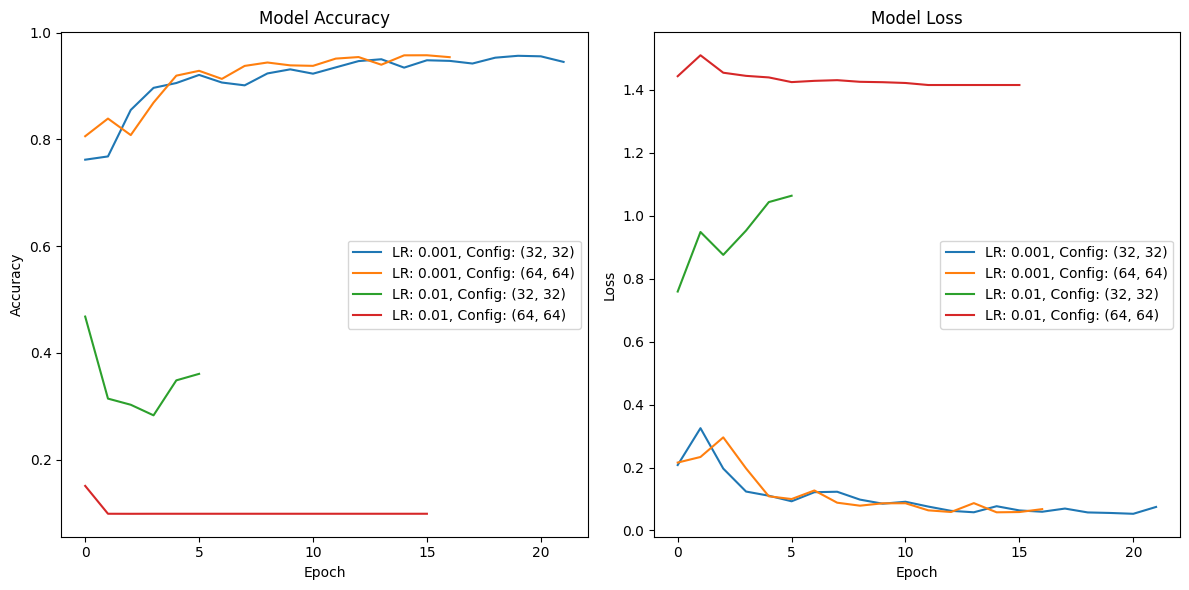

In [6]:
# Initialize lists to store the histories
all_accuracies = []
all_losses = []
labels = []


def build_model(layer_config, learning_rate):
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(
                layer_config[0], activation="relu", input_shape=(784,)
            ),
            tf.keras.layers.Dense(layer_config[1], activation="relu"),
            tf.keras.layers.Dense(10, activation="relu"),
        ]
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    return model


# Example hyperparameters to tune
learning_rates = [0.001, 0.01]
layer_configs = [(32, 32), (64, 64)]
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop through different hyperparameters and train models
for lr in learning_rates:
    for layer_config in layer_configs:
        model = build_model(layer_config, lr)
        history = model.fit(
            X_train, y_train, epochs=100, verbose=0, validation_split=0.1, callbacks = [early_stopping]
        )
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Store the history of each configuration
        all_accuracies.append(history.history["accuracy"])
        all_losses.append(history.history["loss"])
        labels.append(f"LR: {lr}, Config: {layer_config}")

# Now plot all the histories in one plot
plt.figure(figsize=(12, 6))

# Plotting all accuracies
plt.subplot(1, 2, 1)
for i, acc in enumerate(all_accuracies):
    plt.plot(acc, label=labels[i])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# Plotting all losses
plt.subplot(1, 2, 2)
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=labels[i])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()
# 20 min without earlystopping
# 3m with early stopping patience 5

## Visualization
Plot the accuracy and loss for different hyperparameter settings.

## Analysis and Questions
* How did different learning rates affect the training process and model accuracy?
* What impact did varying the number of layers and neurons have on the model's performance?
* Were there any combinations of hyperparameters that resulted in particularly good or poor performance?


------------------------------
## Part 2: Automated Hyperparameter Tuning
### Objective
Use automated methods like Grid Search and Random Search for hyperparameter tuning.

### Setup
Reuse the MNIST dataset setup from Part 2.

### Task: Automated Hyperparameter Tuning
1. Grid Search and Random Search: Introduce and apply Grid Search and Random Search using scikit-learn's GridSearchCV or RandomizedSearchCV.
2. Integration with Keras: Show how to use these methods with Keras models.

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier


# Define a function to create a model (for KerasClassifier)
def create_model_to_search(learning_rate, layer_config):
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(
                layer_config[0], activation="relu", input_shape=(784,)
            ),
            tf.keras.layers.Dense(layer_config[1], activation="relu"),
            tf.keras.layers.Dense(10, activation="relu"),
        ]
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    return model


# Set up GridSearchCV or RandomizedSearchCV
model_to_search = KerasClassifier(build_fn=create_model_to_search)
param_grid = {"learning_rate": [0.001, 0.01], "layer_config": [(32, 32), (64, 64)]}
grid = GridSearchCV(estimator=model_to_search, param_grid=param_grid)

# Run grid search
grid_result = grid.fit(X_train, y_train)

ValueError: Invalid parameter layer_config for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(layer_config=(32, 32))`
Check the list of available parameters with `estimator.get_params().keys()`

## Visualization
Visualize the performance of the best model found by the search methods.
## Analysis and Questions
* Compare the results of manual tuning with automated tuning. Which method gave better results?
* What are the advantages and limitations of using automated methods like Grid Search and Random Search?

